In [1]:
#Importation de la bibliothèque pandas
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

In [2]:
#Chargement des données gender_submission
gender_submission_df=pd.read_csv('C:/Users/matth/TP1/gender_submission.csv')
#Chargement des données test
test_df=pd.read_csv('C:/Users/matth/TP1/test.csv')
#Chargement des données train
train_df=pd.read_csv('C:/Users/matth/TP1/train.csv')

In [3]:
gender_submission_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [4]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
#Remplacement des valeurs manquantes par la médiane pour 'Age' et 'Fare', le mode pour 'Embarked'
for df in [test_df, train_df]:
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [7]:
#Supression des colonnes inutiles
for df in [test_df, train_df]:
    df.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

In [8]:
# fusion test_df avec gender_submission_df 
result_df=test_df.merge(gender_submission_df, on='PassengerId', how='inner')
result_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,1


In [9]:
# Fusion train_df avec gender_submission_df en utilisant la colonne PassengerId comme clé
train_result_df=train_df.merge(gender_submission_df, on='PassengerId', how='inner')
train_result_df.head()

,PassengerId,Survived_x,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived_y


In [10]:
# Concaténation des deux dataframes résultants pour former un seul dataframe pour l'analyse
final_df=pd.concat([result_df, train_result_df], ignore_index=True)
final_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Survived_x,Survived_y
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,0.0,NaN,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,1.0,NaN,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,0.0,NaN,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,0.0,NaN,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,1.0,NaN,NaN


In [11]:
final_df.drop(['Survived_x','Survived_y'], axis=1, inplace=True)

In [12]:
final_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,1.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,1.0


In [13]:
#Statistique descriptive
summary_stats=final_df.describe()
summary_stats

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,29.599282,0.447368,0.392344,35.576535,0.363636
std,120.810458,0.841838,12.703770,0.896760,0.981429,55.850103,0.481622
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.471875,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


In [14]:
#Comptage des valeurs : Obtenons le nombre de passagers par sexe, par classe
passanger_count_by_sex=final_df['Sex'].value_counts()
passanger_count_by_class=final_df['Pclass'].value_counts()

In [15]:
passanger_count_by_sex

male      266
female    152
Name: Sex, dtype: int64

In [16]:
passanger_count_by_class

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [17]:
#Taux de survie : Calculons le taux de survie global et le taux de survie par sexe, classe
survival_rate=final_df['Survived'].mean()
survival_rate_by_sex=final_df.groupby('Sex')['Survived'].mean()
survival_rate_by_class=final_df.groupby('Pclass')['Survived'].mean()

In [18]:
survival_rate

0.36363636363636365

In [19]:
survival_rate_by_sex

Sex
female    1.0
male      0.0
Name: Survived, dtype: float64

In [20]:
survival_rate_by_class

Pclass
1    0.467290
2    0.322581
3    0.330275
Name: Survived, dtype: float64

In [21]:
final_df.drop(['PassengerId', 'Name'], axis=1, inplace=True)

In [22]:
final_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,34.5,0,0,7.8292,Q,0.0
1,3,female,47.0,1,0,7.0000,S,1.0
2,2,male,62.0,0,0,9.6875,Q,0.0
3,3,male,27.0,0,0,8.6625,S,0.0
4,3,female,22.0,1,1,12.2875,S,1.0
...,...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,8.0500,S,0.0
414,1,female,39.0,0,0,108.9000,C,1.0
415,3,male,38.5,0,0,7.2500,S,0.0
416,3,male,27.0,0,0,8.0500,S,0.0


In [23]:
final_df['Survived']

0      0.0
1      1.0
2      0.0
3      0.0
4      1.0
      ... 
413    0.0
414    1.0
415    0.0
416    0.0
417    0.0
Name: Survived, Length: 418, dtype: float64

#### a) Prétraitement

In [24]:
#Encodage des Variables Catégorielles
# Encodage par label pour 'Sex' (catégorie binaire)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
final_df['Sex']=le.fit_transform(final_df['Sex'])
# Encodage one-hot pour 'Embarked' (catégorie non-binaire)
final_df=pd.get_dummies(final_df, columns=['Embarked'], drop_first=True)

In [25]:
final_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,0.0,1,0
1,3,0,47.0,1,0,7.0000,1.0,0,1
2,2,1,62.0,0,0,9.6875,0.0,1,0
3,3,1,27.0,0,0,8.6625,0.0,0,1
4,3,0,22.0,1,1,12.2875,1.0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,0.0,0,1
414,1,0,39.0,0,0,108.9000,1.0,0,0
415,3,1,38.5,0,0,7.2500,0.0,0,1
416,3,1,27.0,0,0,8.0500,0.0,0,1


In [26]:
#Mise à l'échelle des Caractéristiques Numériques avant d'utiliser SVM
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_numeriques=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
final_df[features_numeriques]=scaler.fit_transform(final_df[features_numeriques])

#### b) Sélection de caractéristiques avec RFE

In [27]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
# Définition de l'estimateur
estimator=SVC(kernel="linear")
# Définition du RFE
selector = RFE(estimator, n_features_to_select=5, step=1)  # Ajustez n_features_to_select selon les besoins

In [28]:
from sklearn.model_selection import train_test_split
# Diviser les données en caractéristiques (X) et la cible (y)
X = final_df.drop('Survived', axis=1)  #  'Survived' le nom de la cible
y = final_df['Survived']

In [29]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0.873482,1,0.386231,-0.499470,-0.400248,-0.497413,1,0
1,0.873482,0,1.371370,0.616992,-0.400248,-0.512278,0,1
2,-0.315819,1,2.553537,-0.499470,-0.400248,-0.464100,1,0
3,0.873482,1,-0.204852,-0.499470,-0.400248,-0.482475,0,1
4,0.873482,0,-0.598908,0.616992,0.619896,-0.417492,0,1
...,...,...,...,...,...,...,...,...
413,0.873482,1,-0.204852,-0.499470,-0.400248,-0.493455,0,1
414,-1.505120,0,0.740881,-0.499470,-0.400248,1.314435,0,0
415,0.873482,1,0.701476,-0.499470,-0.400248,-0.507796,0,1
416,0.873482,1,-0.204852,-0.499470,-0.400248,-0.493455,0,1


In [30]:
y

0      0.0
1      1.0
2      0.0
3      0.0
4      1.0
      ... 
413    0.0
414    1.0
415    0.0
416    0.0
417    0.0
Name: Survived, Length: 418, dtype: float64

In [31]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Adapter le RFE aux données d'entraînement
selector.fit(X_train, y_train)

# Sélectionner les caractéristiques importantes
selected_features = X_train.columns[selector.support_]

# Afficher les caractéristiques sélectionnées et leur classement
print("Caractéristiques sélectionnées:")
print(selected_features)
# Afficher le classement des caractéristiques
print("Classement des caractéristiques:")
print(selector.ranking_)

Caractéristiques sélectionnées:
Index(['Sex', 'Age', 'SibSp', 'Parch', 'Embarked_S'], dtype='object')
Classement des caractéristiques:
[3 1 1 1 1 4 2 1]


In [33]:
# Utiliser seulement les caractéristiques sélectionnées
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [34]:
# Former un modèle de SVM avec les caractéristiques sélectionnées
svm_model = SVC(kernel="linear")
svm_model.fit(X_train_selected, y_train)

SVC(kernel='linear')

In [35]:
# Prédire avec le modèle
y_pred = svm_model.predict(X_test_selected)

In [36]:
y_pred

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1.])

In [37]:
# Calculer l'exactitude du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Exactitude du modèle : {:.2f}%".format(accuracy * 100))

Exactitude du modèle : 100.00%


#### c) Sélection avec ACP

Expérience 1 : Appliquer une ACP sur votre dataset train prêt à
l’emploi

In [38]:
X = final_df.values

In [39]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

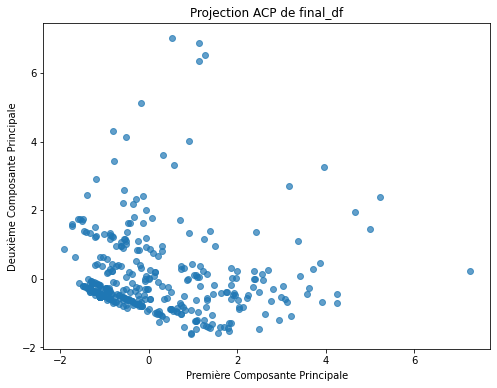

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel('Première Composante Principale')
plt.ylabel('Deuxième Composante Principale')
plt.title('Projection ACP de final_df')
plt.show()

In [41]:
pca.explained_variance_ratio_

array([0.34186336, 0.24163943])

 Expérience 2 : Faites une selection des caractéristiques sur votre
dataset train prêt à l’emploi et ensuite appliquez-y une ACP

In [42]:
features_to_keep = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex'] + [col for col in final_df.columns if 'Embarked' in col]

X_selected = final_df[features_to_keep].values

In [43]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_selected)

In [44]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

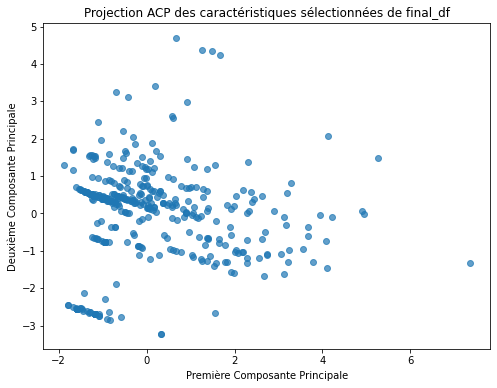

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel('Première Composante Principale')
plt.ylabel('Deuxième Composante Principale')
plt.title('Projection ACP des caractéristiques sélectionnées de final_df')
plt.show()

In [46]:
pca.explained_variance_ratio_

array([0.26072396, 0.20296688])

#### d) Régression logistique (avec scikit-learn)

In [47]:
X = final_df[features_to_keep].values
y = final_df['Survived'].values

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [50]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatrice de confusion:\n", confusion_matrix(y_test, y_pred))
print("\nRapport de classification:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Matrice de confusion:
 [[50  0]
 [ 0 34]]

Rapport de classification:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



#### e) Décision Tree

In [51]:
X = final_df.drop(['Survived'], axis=1).values
y = final_df['Survived'].values

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
from sklearn.tree import DecisionTreeClassifier

# Création du modèle d'arbre de décision
model = DecisionTreeClassifier(random_state=42)

# Entraînement du modèle
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [54]:
# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul et affichage de la précision
print("Accuracy:", accuracy_score(y_test, y_pred))

# Affichage de la matrice de confusion
print("\nMatrice de confusion:\n", confusion_matrix(y_test, y_pred))

# Affichage du rapport de classification
print("\nRapport de classification:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Matrice de confusion:
 [[50  0]
 [ 0 34]]

Rapport de classification:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



#### f) Random Forest

In [55]:
X = final_df.drop('Survived', axis=1)  # Supposer 'Survived' est la colonne d'étiquette
y = final_df['Survived']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
from sklearn.ensemble import RandomForestClassifier

# Création du modèle Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators est le nombre d'arbres

# Entraînement du modèle sur l'ensemble d'entraînement
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [58]:
# Prédiction sur l'ensemble de test
y_pred = random_forest_model.predict(X_test)

# Calcul et affichage de la précision
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Affichage de la matrice de confusion
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Affichage du rapport de classification
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[50  0]
 [ 0 34]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



#### g) K-means

In [59]:
X = final_df.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [60]:
from sklearn.cluster import KMeans

# Choix du nombre de clusters
k = 2

# Application de K-means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Les centres des clusters
centroids = kmeans.cluster_centers_

# Étiquettes de cluster pour chaque point
labels = kmeans.labels_

In [61]:
from sklearn.metrics import silhouette_score

silhouette = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {silhouette}")

Silhouette Score: 0.30972480070311453


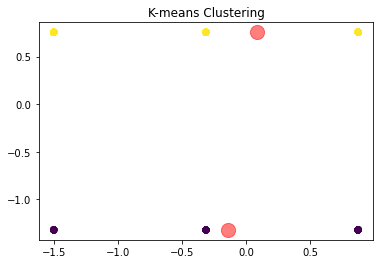

In [62]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)  # Centres de clusters
plt.title('K-means Clustering')
plt.show()